In [1]:
import tensorflow as tf
import tensorflow_io as tfio
from models.vqvae2 import *
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time
from loader import *

from IPython.display import Audio 
import librosa
import librosa.display

/home/jerms/.pyenv/versions/3.8.12/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
train_dataset, test_dataset = get_training_set()

2021-10-15 19:10:08.454649: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 19:10:08.561179: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 19:10:08.562375: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-15 19:10:08.564705: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

loading spectrogram
loading spectrogram


In [3]:
vqvae_trainer = VQVAETrainer(latent_dim=None, num_embeddings=None)
vqvae_trainer.load_weights("/home/jerms/daniil/new_vae/saved_models/vqvae2_run_stft_1")
vqvae_trainer.compile(optimizer=keras.optimizers.Adam())

In [4]:
def get_predictions(model, test_samples):
    predictions = model.vqvae(test_samples)
    return predictions

In [5]:
for test_batch in test_dataset.take(1):
    test_sample = test_batch[0][0:16, :, :, :]

2021-10-15 19:10:11.982009: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [6]:
preds = get_predictions(vqvae_trainer, test_sample)

2021-10-15 19:10:14.417698: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100


In [7]:
audio_index = 1

In [8]:
db_stft = test_sample[audio_index][:, :, 0].numpy() * -80
reconstructed_stft = preds[audio_index][:, :, 0].numpy() * -80

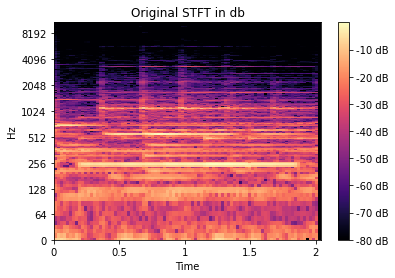

In [9]:
fig, ax = plt.subplots()
img = librosa.display.specshow(db_stft,
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Original STFT in db')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

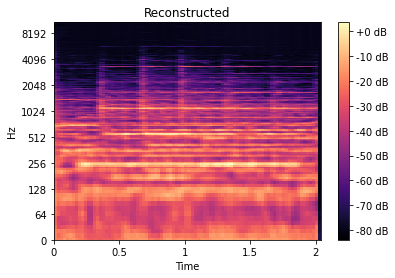

In [10]:
fig, ax = plt.subplots()
img = librosa.display.specshow(reconstructed_stft,y_axis='log', x_axis='time', ax=ax)
ax.set_title('Reconstructed')
fig.colorbar(img, ax=ax, format="%+2.0f dB")


In [11]:
orig_amp = librosa.db_to_amplitude(db_stft)
y = librosa.griffinlim(orig_amp)

In [12]:
Audio(y, rate=22050)

In [13]:
reconstructed_amp = librosa.db_to_amplitude(reconstructed_stft)
y_ = librosa.griffinlim(reconstructed_amp)

In [14]:
Audio(y_, rate=22050)